# Explanation

## Introduction

After learning about Adversarial Search in Artificial Intelligence and Game Theory, I wanted to dive deeper into its use in modern machine learning. That's when I discovered Generative Adversarial Networks (GANs).

A GAN is a type of generative model that has two main parts: a Generative model (G) and a Discriminative model (D). These components interact with each other in a way that resembles a minimax game. The Discriminative model aims to maximize its value function, while the Generative model aims to minimize its value function.

The goal of this project is to train a generative model which can produce images.

## Notations

$z$ : noise 

$x$ : input of discriminator

$G$ : generator function, $\theta_g$ : parameters of function G

$D$ : discriminator function, $\theta_d$ : parameters of function D

$P_z$ : noise distribution

$P_{data}$ : real data distribution
 
$P_g$ : generated data using G distribution

$m$ : mini batch size

## Overview of GAN

As i mentioned earlier, the GAN consists of two parts. The generative model takes noisy variables $Z$ as input and maps them to the data space. This mapping can be represented by a differentiable function $G(z;\theta_g) = x$, which can be implemented as a multilayer perceptron with parameters 𝜃𝑔. On the other hand, the discriminative model's task is to determine whether inputs belong to the data distribution or not. It operates like a classifier, labeling inputs based on their likelihood of coming from the data distribution. The function $D(x; \theta_d)$ represents the probability of $X$ belonging to the data distribution.

Now, we can combine these two components. The generator's objective is to map random noisy inputs $Z$ to $X$ in such a way that the discriminator cannot detect that they are generated samples from $P_g$. At the same time, the discriminator aims to learn the most accurate model possible, enabling it to distinguish between real and fake data.

After training this model, we will be able to generate data (such as images) that closely resemble real data. 

## Generator Network

What the generator does is similar to finding a transformation function that minimizes an objective function. In mathematical terms, let's assume that $Z$ is drawn from a distribution called $P_z$. Our goal is to find a transformation function, denoted as $G$, that can accurately estimate the real data distribution called $P_{data}$. Essentially, the generator's objective is to make the discriminator unable to distinguish between real data from $P_{data}$ and fake data from $P_g$.

To achieve this, we can define a suitable loss function for the generator using binary cross entropy.

$loss_G = -\frac{1}{m}\sum_{z} \log(1 - D(G(z)))$ 


**Note : Generative loss doesn't have term $\log(D(x))$ because when we calculate gradient of loss with respect to $\theta_g$, $\frac{\partial D}{\partial \theta_g}$ is equal to zero.**

## Discriminator Network

The discriminator is responsible for labeling the inputs by determining if they belong to the data distribution. In simpler terms, the discriminator acts like a sigmoid function that outputs the probability of an input $x$ belonging to the real data distribution $P_{data}$. It is reasonable to use binary cross entropy as the loss function for the discriminator. Therefore one possible loss function for the discriminator might be binary cross entropy. 

$loss_D = -\frac{1}{m}\sum y\log(\hat{y}) + (1-y)\log(1-\hat{y}) = -\frac{1}{m}\sum_{x,z} \log(D(x)) + \log(1-D(G(z)))$

## Theoretical Formulation

In this part, let's dive into the math behind GANs.

To begin, we introduce a new loss function that leverages the adversarial nature of the network. In previous sections, the loss functions we defined were based on practical usage. However, the authors of GANs determined a value function using a minimax game, which can be expressed as follows:

$V(D,G) = E_{x \sim P_{data}}[\log(D(x))] + E_{z \sim P_{z}}[log(1-D(G(z)))]$

So, if we consider D as a maximum node and G as a minimum node, we can view the network as an optimization problem:

$min_G max_D V(D,G) = E_{x \sim P_{data}}[\log(D(x))] + E_{z \sim P_{z}}[log(1-D(G(z)))]$

This equation effectively demonstrates the competition. It is consistent with our previous definition of loss functions. Although those loss functions were separate, decreasing the loss of G will result in an increase in the loss of D, and vice versa. Summation over all xs and zs and dividing by m can be seen as an expected value.

### Model Optimization

In this part, we will discuss two important aspects:

Finding the optimal discriminator (D) for a fixed generator (G).
The condition for reaching the global minimum, which occurs when the generator's output distribution ($P_{g}$) matches the real data distribution ($P_{data}$).
The first aspect focuses on training the discriminator in relation to a fixed generator. We aim to find the discriminator's optimum performance. Let's explore this further.

When the generator (G) is fixed, our objective is to maximize the value function by adjusting the discriminator (D).

<ul>

Value function = $E_{x \sim P_{data}}[\log(D(x))] + E_{z \sim P_{z}}[log(1-D(G(z)))]$ (1)

$E[f(X)] = \int_{x} p(x) f(x) dx$ (2)

$^{(1),(2)}=> V(G,D) = \int_{x} p_{data}(x) log(D(x)) dx + \int_{z}p_z(z) log(1-D(G(z))) dz$.

$G(z)= x$ and $P_g$ and $P_{data}$ come from same domain $=> V(G,D) = \int_{x} p_{data}(x) log(D(x)) + p_{g}(x) log(1-D(x)) dx$

Now, let's differentiate the above equation to find the optimal discriminator (D):
    
$\frac{\partial V(G,D)}{\partial D} =^{(*)} \int_{x} \frac{1}{\partial D} (p_{data}(x) log(D(x)) + p_{g}(x) log(1-D(x))) dx = \int_{x} \frac{p_{data}(x)}{D(x)} - \frac{p_{g}(x)}{1-D(x)} dx =>$

$\int_{x} \frac{p_{data}(x)}{D(x)} dx = \int_{x} \frac{p_{g}(x)}{1-D(x)} dx =^{(**)} \frac{p_{data}(x)}{D(x)} = \frac{p_{g}(x)}{1-D(x)} =>$

$D^*(x) = \frac{p_{data}(x)}{p_{data}(x) + p_{g}(x)}$
</ul>

\* : I used [differentiation under the integral sign rule](https://en.wikipedia.org/wiki/Leibniz_integral_rule#General_form:_differentiation_under_the_integral_sign). 
It's important to note that the integrals we're calculating are over finite intervals. 

\** : $\int_{a}^{x} f(x) dx = \int_{a}^{x} g(x) dx =>^{\frac{1}{\partial x}} f(x) = g(x)$, so for any x, f is equal to g.


Now we substitute D* with D in the value function equation. We will use new function $C(G)$ and with using this function we are able to minimize $max V$ based on G.

<ul>

$C(G) = max_D V(G,D) = E_{x \sim P_{data}}[\log(\frac{p_{data}(x)}{p_{data}(x) + p_{g}(x)})] + E_{x \sim P_{g}}[log(\frac{p_{g}(x)}{p_{data}(x) + p_{g}(x)})]$
    
</ul>

The second item relates to how we train the generator. After several iterations, we can assume that the discriminator is close to its optimum, and then we can train the generator to deceive this discriminator. We need to prove that the global minimum of $C(G)$ is achieved if and only if $p_g=p_{data}$.

First, let's examine the form of [Jensen–Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence).

<ul>
$JS(P1 || P2) = \frac{1}{2}E_{x \sim P1}(\frac{P1}{\frac{P1 + P2}{2}}) + \frac{1}{2}E_{x \sim P2}(\frac{P2}{\frac{P1 + P2}{2}})$
</ul>

    
So we can express $C(G)$ in a form that resembles the Jenson-Shannon divergence.

<ul>
$\log(a+b) = \log(a) + \log(b) =>$    
    
$C(G) = E_{x \sim P_{data}}[\log(\frac{p_{data}(x)}{\frac{p_{data}(x) + p_{g}(x)}{2}})] + E_{x \sim P_{g}}[log(\frac{p_{g}(x)}{\frac{p_{data}(x) + p_{g}(x)}{2}})] - 2\log(2) = 2JS(P_{data} || p_{g}) - 2\log(2)$
</ul> 

Since the Jensen-Shannon divergence between two distributions is non-negative and zero only when the two distributions are equal, $C(G)$ achieve its global minimum which is $-2\log(2)$ when $P_{data} = P_{g}$. In other words, $P_{g}$ and $P_{data}$ should be as close to each other as possible. The optimal generator G is thus one that which is able to mimic pdata to model a compelling model distribution $p_{g}$.

## Overview

With this theoretical intuition, I am going to implement a generator for the [MNIST dataset](https://www.tensorflow.org/datasets/catalog/mnist). The dataset is suitable for a faster training process, and each image is a 28x28 grayscale image.

The discriminator is a simple deep classifier that takes real and fake images as inputs and tries to distinguish between them. In order to prevent extreme extrapolation behavior in the discriminator, i replaced labels 1 with a noisy random value less than 1.

The generator takes noisy inputs and generates fake images. I used transposed convolutions to expand dimensions. 

Some tips for improving the GANs can be found [here](https://machinelearningmastery.com/how-to-train-stable-generative-adversarial-networks/).

**NOTE :** Training a generative model can be challenging. I only trained the model for 120 epochs, which is not sufficient for it to fully converge to an optimal state. However, even after 120 epochs, the model managed to generate reasonably good images and could occasionally deceive the discriminator (most of the generated images had a probability of being classified as real greater than 0.5).

# Implementation

## Packages

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, LeakyReLU, ReLU,Dropout, Reshape, BatchNormalization, Conv2DTranspose
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Hyper Parameters

In [2]:
BATCH_SIZE = 256
EPOCHS = 120
NOISE_DIM = 100

## GPU

In [3]:
# # Bringing in tensorflow
# import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)
# gpus

## Importing the DataSet

In [4]:
dataset = tfds.load('mnist', split='train')

In [5]:
dataset

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

## Visualizing

In [6]:
iterator = dataset.as_numpy_iterator()

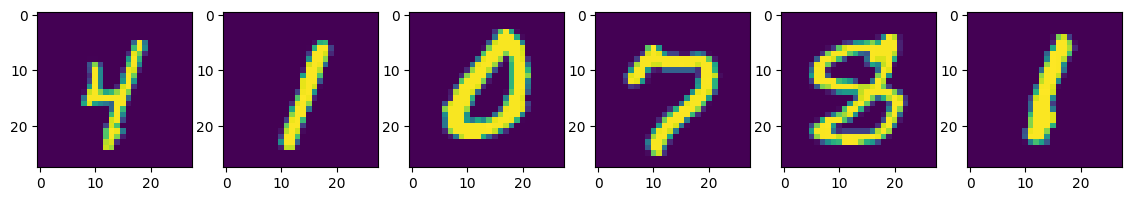

In [7]:
figure, axis = plt.subplots(ncols=6, figsize=(14,14))

for i in range(6) :
    sample = iterator.next()
    axis[i].imshow(np.squeeze(sample['image'])) # remove axes of length one from image

## Scaling and Loading the Batches

In [8]:
def scale_image(sample) :
    return (tf.cast(sample['image'], tf.float32) - 127.5) / 127.5 # scaling to the range of the tanh activation function [-1, 1]

In [9]:
# running the dataset through scale_image function in order to scale all images in the dataset
scaled_dataset = dataset.map(scale_image)

In [10]:
scaled_dataset = scaled_dataset.cache() # caching the elements of the dataset for faster retrieval
scaled_dataset = scaled_dataset.shuffle(60000)
scaled_dataset = scaled_dataset.batch(BATCH_SIZE)
scaled_dataset = scaled_dataset.prefetch(64) # 64 batches should be loaded asynchronously while the current batch is being processed

In [11]:
scaled_dataset.as_numpy_iterator().next().shape

(256, 28, 28, 1)

## Neural Network

### Generator

In [12]:
def get_generator() :
    model = Sequential()

    model.add(Dense(7*7*256, use_bias=False, input_dim=NOISE_DIM))
    model.add(BatchNormalization())
    model.add(ReLU())
    model.add(Reshape((7, 7, 256)))

    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())

    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(ReLU())

    model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    
    return model

In [13]:
generator_model = get_generator()

In [14]:
generator_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (Batch  (None, 12544)             50176     
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 7, 7, 128)         819200    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 128)         5

### Discriminator

In [15]:
def get_discriminator(): 
    model = Sequential()

    model.add(Conv2D(64, 5, strides=(2, 2), padding='same',input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(128, 5, strides=(2, 2), padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Conv2D(256, 5, strides=(2, 2), padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(1))
    
    return model

In [16]:
discriminator_model = get_discriminator()

In [17]:
discriminator_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_3 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                      

## Training Loop

### Optimizers

In [18]:
generator_optimizer = Adam(learning_rate=0.0001, beta_1=0.22)
discriminator_optimizer = Adam(learning_rate=0.0001, beta_1=0.42)

### Loss functions

In [19]:
generator_loss = BinaryCrossentropy(from_logits=True)
discriminator_loss = BinaryCrossentropy(from_logits=True)

### Costum Model

In [20]:
class GAN(Model) :
    def __init__(self, generator, discriminator, *args, **kwargs) :
        super().__init__(*args, **kwargs)
        self.generator = generator
        self.discriminator = discriminator
    
    def compile(self, generator_optimizer, discriminator_optimizer, generator_loss, discriminator_loss, *args, **kwargs) :
        super().compile(*args, **kwargs)
        self.generator_optimizer = generator_optimizer
        self.discriminator_optimizer = discriminator_optimizer
        self.generator_loss = generator_loss
        self.discriminator_loss = discriminator_loss
        
    def train_step(self, real_images) :
        
        with tf.GradientTape() as discriminator_tape, tf.GradientTape() as generator_tape :
            fake_images = self.generator(tf.random.normal((BATCH_SIZE, NOISE_DIM, 1)), training=True)
            
            yhat_real_images = self.discriminator(real_images, training=True)
            yhat_fake_images = self.discriminator(fake_images, training=True)
            
            yhat = tf.concat([yhat_fake_images, yhat_real_images], axis=0)
            y = tf.concat([tf.zeros_like(yhat_fake_images), tf.ones_like(yhat_real_images)], axis=0)

            
            noise_real_images = -0.17 * tf.random.normal(tf.shape(yhat_real_images))
            noise_fake_images = tf.zeros_like(yhat_fake_images)
            y += tf.concat([noise_fake_images, noise_real_images], axis=0)
            
            discriminator_loss = self.discriminator_loss(y, yhat)
            generator_loss = self.generator_loss(tf.ones_like(yhat_fake_images), yhat_fake_images) 

            
        discriminator_gradients = discriminator_tape.gradient(discriminator_loss, self.discriminator.trainable_variables)
        generator_gradients = generator_tape.gradient(generator_loss, self.generator.trainable_variables)
       
        self.discriminator_optimizer.apply_gradients(zip(discriminator_gradients, self.discriminator.trainable_variables))
        self.generator_optimizer.apply_gradients(zip(generator_gradients, self.generator.trainable_variables))
        
        return {'generator_loss':generator_loss, 'discriminator_loss':discriminator_loss}

In [21]:
GAN_model = GAN(generator_model, discriminator_model)

In [22]:
GAN_model.compile(generator_optimizer, discriminator_optimizer, generator_loss, discriminator_loss)

## Training

In [23]:
hist = GAN_model.fit(scaled_dataset, epochs=EPOCHS)

Epoch 1/120


2023-12-25 16:53:15.918967: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


235/235 [==============================] - 16s 42ms/step - generator_loss: 2.8524 - discriminator_loss: 0.2492
Epoch 2/120
235/235 [==============================] - 10s 42ms/step - generator_loss: 4.4199 - discriminator_loss: 0.0850
Epoch 3/120
235/235 [==============================] - 10s 42ms/step - generator_loss: 4.9473 - discriminator_loss: 0.1843
Epoch 4/120
235/235 [==============================] - 10s 42ms/step - generator_loss: 3.5653 - discriminator_loss: 0.3171
Epoch 5/120
235/235 [==============================] - 10s 42ms/step - generator_loss: 2.6760 - discriminator_loss: 0.4198
Epoch 6/120
235/235 [==============================] - 10s 42ms/step - generator_loss: 2.2810 - discriminator_loss: 0.4492
Epoch 7/120
235/235 [==============================] - 10s 42ms/step - generator_loss: 2.0289 - discriminator_loss: 0.4640
Epoch 8/120
235/235 [==============================] - 10s 42ms/step - generator_loss: 1.8068 - discriminator_loss: 0.4928
Epoch 9/120
235/235 [=======

## Evaluating

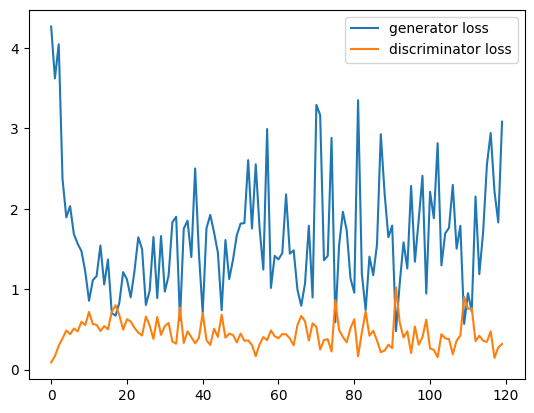

In [27]:
plt.plot(hist.history['generator_loss'], label='generator loss')
plt.plot(hist.history['discriminator_loss'], label='discriminator loss')
plt.legend(loc='best')

## Testing

1/1 [==============================] - 0s 18ms/step


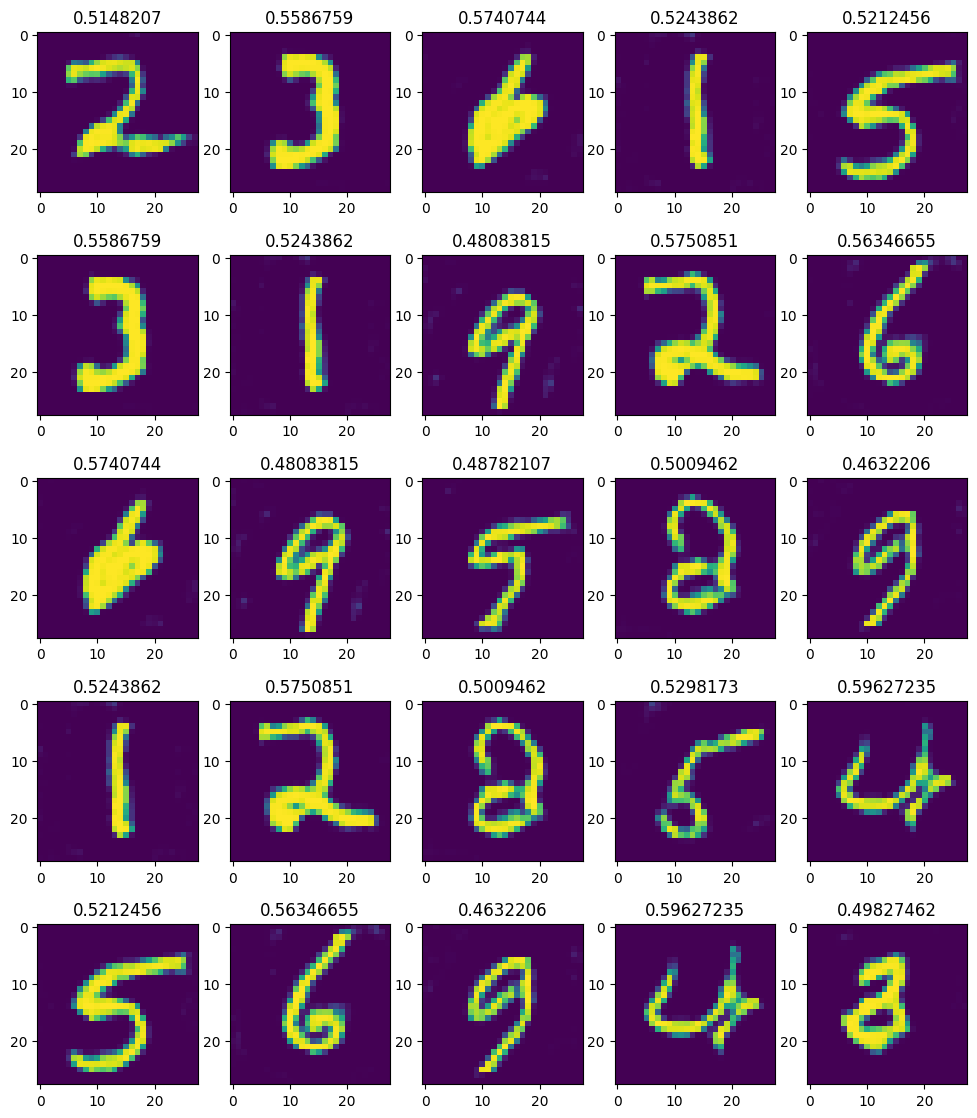

In [35]:
noise = tf.random.normal((25, NOISE_DIM, 1))
generated_images = generator_model.predict(noise)
predicted_lables = discriminator_model.predict(generated_images)
predictions = tf.nn.sigmoid(predicted_lables).numpy()

figure, axis = plt.subplots(ncols=5, nrows=5, figsize=(12,14))
for row in range(5): 
    for col in range(5): 
        axis[row][col].imshow(generated_images[(row + 1) * (col + 1) - 1])
        axis[row][col].title.set_text(predictions[(row + 1) * (col + 1) - 1][0])

In [36]:
generator_model.save('generator_model.h5')